In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import requests
from sklearn import datasets
from sklearn.preprocessing import normalize
from tensorflow.python.framework import ops

ops.reset_default_graph()
sess = tf.Session()

In [2]:
bc = datasets.load_breast_cancer()

In [4]:
bc.data.shape

(569, 30)

In [9]:
bc.data

array([[  1.79900000e+01,   1.03800000e+01,   1.22800000e+02, ...,
          2.65400000e-01,   4.60100000e-01,   1.18900000e-01],
       [  2.05700000e+01,   1.77700000e+01,   1.32900000e+02, ...,
          1.86000000e-01,   2.75000000e-01,   8.90200000e-02],
       [  1.96900000e+01,   2.12500000e+01,   1.30000000e+02, ...,
          2.43000000e-01,   3.61300000e-01,   8.75800000e-02],
       ..., 
       [  1.66000000e+01,   2.80800000e+01,   1.08300000e+02, ...,
          1.41800000e-01,   2.21800000e-01,   7.82000000e-02],
       [  2.06000000e+01,   2.93300000e+01,   1.40100000e+02, ...,
          2.65000000e-01,   4.08700000e-01,   1.24000000e-01],
       [  7.76000000e+00,   2.45400000e+01,   4.79200000e+01, ...,
          0.00000000e+00,   2.87100000e-01,   7.03900000e-02]])

In [6]:
bc.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0,

In [7]:
bc.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='<U23')

#### Split data into train & test

In [15]:
x_vals = bc.data
y_vals = bc.target

train_indices = np.random.choice(len(x_vals), round(len(x_vals)*0.8), replace=False)

In [18]:
test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))

In [19]:
test_indices

array([512,   1, 514,   5, 518,  10,  13,  14,  16,  18, 532,  21, 535,
       536, 542, 543,  33, 548,  37, 550,  39, 552,  42, 556,  46,  47,
       558,  49, 564, 568,  61,  62,  74,  80,  81,  90, 104, 105, 106,
       117, 120, 123, 124, 127, 128, 137, 145, 146, 152, 159, 161, 164,
       168, 175, 176, 179, 183, 185, 192, 198, 200, 202, 208, 220, 223,
       227, 233, 234, 242, 243, 248, 251, 263, 268, 269, 270, 284, 294,
       304, 313, 317, 318, 321, 322, 325, 332, 344, 356, 368, 369, 380,
       381, 384, 385, 390, 414, 420, 429, 432, 438, 446, 447, 450, 451,
       459, 460, 463, 480, 481, 483, 485, 487, 493, 506])

In [20]:
train_indices

array([118, 283, 494, 310, 457, 395, 421, 160, 153, 305, 327, 326, 504,
       508, 489, 131, 537, 113, 195,   6, 245, 116, 400, 502, 455, 525,
       265, 528, 436, 224, 366,   8, 517, 469, 214,  53, 408, 258, 343,
       374, 132, 289, 527, 491, 516, 412, 563,  67, 250, 405,  87, 348,
       398, 392, 474, 484, 462, 279, 173, 540, 236, 276,  11, 456, 156,
       331, 166, 136,  23, 407, 342, 387, 498, 360,  82, 178, 281, 413,
       187,  88, 174, 323, 239, 298, 154,  32, 328, 199,  69, 129, 273,
       373, 240, 181, 352, 490, 221,   9, 100, 354, 388, 371, 461, 402,
       557,  38, 253, 102, 266, 246, 510,  44, 189,  66, 138, 365, 167,
       519, 190, 479,  52,   4, 286,  77, 544, 437, 222, 158, 529, 430,
       415, 111,  57,  64, 204,  34, 193, 309, 303,  60, 280, 108,  98,
       411, 316, 140,  40, 391, 162, 377, 182, 333, 148, 428, 565, 230,
       353, 290, 561, 336, 497, 539, 513, 526,  17, 291,  26, 134,  94,
        54,   0,  86, 141, 119, 492, 389,  97,  93, 341, 231, 54

In [21]:
x_vals_train = x_vals[train_indices]
x_vals_test = x_vals[test_indices]
y_vals_train = y_vals[train_indices]
y_vals_test = y_vals[test_indices]

###  Creating the placeholders for input data & target data

In [22]:
batch_size = 25

x_data = tf.placeholder(shape=[None,30], dtype=tf.float32)
y_target = tf.placeholder(shape=[None,1], dtype=tf.float32)

#### Model parameters should be variables as they keep on changing

In [23]:
A = tf.Variable(tf.random_normal(shape=[30,1], dtype=tf.float32))
b = tf.Variable(tf.random_normal(shape=[1,1]))

#### Model Creation

In [24]:
model_output = tf.add(tf.matmul(x_data, A), b)

#### Loss Calculation

In [26]:
loss = tf.reduce_mean( tf.nn.sigmoid_cross_entropy_with_logits(logits=model_output, labels=y_target))

In [27]:
init = tf.global_variables_initializer()

In [28]:
sess.run(init)

In [29]:
my_opt = tf.train.GradientDescentOptimizer(0.01)

In [30]:
train_step = my_opt.minimize(loss)

#### Create prediction, find accuracy

In [32]:
prediction = tf.round(tf.sigmoid(model_output))

prediction_correct = tf.cast(tf.equal(prediction, y_target), tf.float32)

accuracy = tf.reduce_mean(prediction_correct)

#### Train model

In [33]:
loss_vec = []
train_acc = []
test_acc = []

In [34]:
for i in range(1000):
    rand_index = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = x_vals_train[rand_index]
    rand_y = np.transpose([y_vals_train[rand_index]])
    
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    
    loss_vec.append(temp_loss)
    
    temp_acc_train = sess.run(accuracy, feed_dict={x_data: x_vals_train, y_target: np.transpose([y_vals_train])})
    
    train_acc.append(temp_acc_train)
    
    temp_acc_test = sess.run(accuracy, feed_dict={x_data: x_vals_test, y_target: np.transpose([y_vals_test])})
    
    test_acc.append(temp_acc_test)

In [35]:
test_acc

[0.3508772,
 0.3508772,
 0.64912283,
 0.3508772,
 0.64912283,
 0.3508772,
 0.3508772,
 0.64912283,
 0.3508772,
 0.3508772,
 0.64912283,
 0.3508772,
 0.64912283,
 0.84210527,
 0.64912283,
 0.3508772,
 0.64912283,
 0.3508772,
 0.64912283,
 0.3508772,
 0.3508772,
 0.64912283,
 0.3508772,
 0.3508772,
 0.64912283,
 0.3508772,
 0.64912283,
 0.3508772,
 0.64912283,
 0.3508772,
 0.64912283,
 0.64912283,
 0.3508772,
 0.4649123,
 0.64912283,
 0.3508772,
 0.64912283,
 0.3508772,
 0.64912283,
 0.3508772,
 0.64912283,
 0.3508772,
 0.67543858,
 0.3508772,
 0.89473683,
 0.87719297,
 0.37719297,
 0.64912283,
 0.75438595,
 0.3508772,
 0.88596493,
 0.57894737,
 0.65789473,
 0.3508772,
 0.3508772,
 0.64912283,
 0.3508772,
 0.85964912,
 0.3508772,
 0.89473683,
 0.89473683,
 0.88596493,
 0.89473683,
 0.81578946,
 0.80701756,
 0.3508772,
 0.86842108,
 0.87719297,
 0.78070176,
 0.3508772,
 0.86842108,
 0.3508772,
 0.66666669,
 0.3508772,
 0.67543858,
 0.3508772,
 0.3859649,
 0.64912283,
 0.70175439,
 0.65789

In [36]:
train_acc

[0.37802199,
 0.37802199,
 0.62197804,
 0.37802199,
 0.62197804,
 0.37802199,
 0.37802199,
 0.62197804,
 0.37802199,
 0.37802199,
 0.62197804,
 0.37802199,
 0.62197804,
 0.80879122,
 0.62197804,
 0.37802199,
 0.62197804,
 0.37802199,
 0.62197804,
 0.37802199,
 0.37802199,
 0.62197804,
 0.37802199,
 0.37802199,
 0.62197804,
 0.37802199,
 0.62197804,
 0.37802199,
 0.62417585,
 0.37802199,
 0.63296705,
 0.62197804,
 0.37802199,
 0.4967033,
 0.62197804,
 0.37802199,
 0.62197804,
 0.37802199,
 0.62197804,
 0.37802199,
 0.62637365,
 0.37802199,
 0.66153848,
 0.37802199,
 0.90329671,
 0.85274726,
 0.40000001,
 0.62197804,
 0.74945056,
 0.37802199,
 0.91648352,
 0.58461541,
 0.63296705,
 0.37802199,
 0.37802199,
 0.62637365,
 0.37802199,
 0.81758243,
 0.37802199,
 0.87912089,
 0.87252748,
 0.90989012,
 0.90989012,
 0.7846154,
 0.7846154,
 0.37802199,
 0.83736265,
 0.84835166,
 0.77802199,
 0.37802199,
 0.84175825,
 0.37802199,
 0.64395607,
 0.37802199,
 0.66593409,
 0.37802199,
 0.41538462,
 0

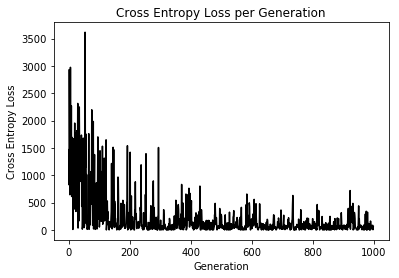

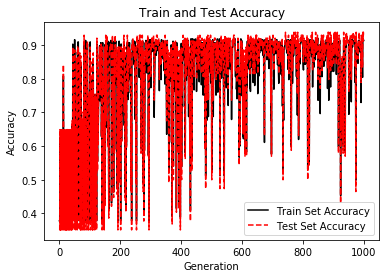

In [37]:
plt.plot(loss_vec, 'k-')
plt.title('Cross Entropy Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Cross Entropy Loss')
plt.show()
plt.plot(train_acc, 'k-', label='Train Set Accuracy')
plt.plot(test_acc, 'r--', label='Test Set Accuracy')
plt.title('Train and Test Accuracy')
plt.xlabel('Generation')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()